**A/B Testing Analysis**

**Step 1: Install Required Libraries**

In [3]:
!pip install numpy pandas scipy statsmodels matplotlib seaborn


**Step 2: Import Libraries**

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


**Step 3: Load and Prepare the Data**

In [15]:
# Generate a synthetic dataset
np.random.seed(42)

# Control group
control_group = np.random.binomial(1, 0.1, 1000)  # 10% conversion rate
control_df = pd.DataFrame({'Group': 'Control', 'Converted': control_group})

# Treatment group
treatment_group = np.random.binomial(1, 0.12, 1000)  # 12% conversion rate
treatment_df = pd.DataFrame({'Group': 'Treatment', 'Converted': treatment_group})

# Combine the datasets
df = pd.concat([control_df, treatment_df]).reset_index(drop=True)
df.head()



,Group,Converted
0,Control,0
1,Control,1
2,Control,0
3,Control,0
4,Control,0


**Step 4: Exploratory Data Analysis (EDA)**

Group
Control      0.100
Treatment    0.112
Name: Converted, dtype: float64


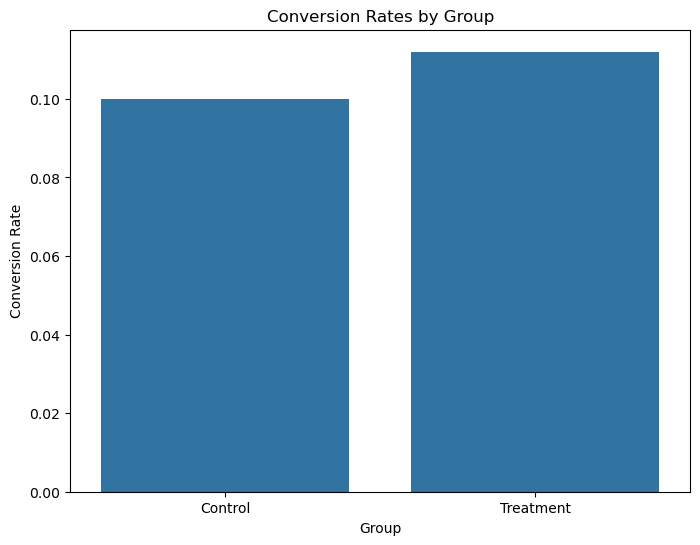

In [17]:
# Conversion rates
conversion_rates = df.groupby('Group')['Converted'].mean()
print(conversion_rates)

# Plot conversion rates
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Converted', data=df, errorbar=None)
plt.title('Conversion Rates by Group')
plt.ylabel('Conversion Rate')
plt.show()


**Step 5: Hypothesis Testing**

In [20]:
# Calculate the conversion rates
control_converted = df[df['Group'] == 'Control']['Converted']
treatment_converted = df[df['Group'] == 'Treatment']['Converted']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(control_converted, treatment_converted)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: -0.8713844553435877, P-value: 0.38364896061020115


In [22]:
# Number of conversions and trials
n_control = control_converted.size
n_treatment = treatment_converted.size
convert_control = control_converted.sum()
convert_treatment = treatment_converted.sum()

# Perform a z-test for proportions
z_stat, p_value = sm.stats.proportions_ztest([convert_control, convert_treatment], [n_control, n_treatment])
print(f'Z-statistic: {z_stat}, P-value: {p_value}')


Z-statistic: -0.8716548604640172, P-value: 0.3833966925145822


**Step 6: Analyze the Results**

In [25]:
# Analyze the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the control and treatment groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the control and treatment groups.")


Fail to reject the null hypothesis: There is no significant difference between the control and treatment groups.


**Step 7: Visualize the Results**

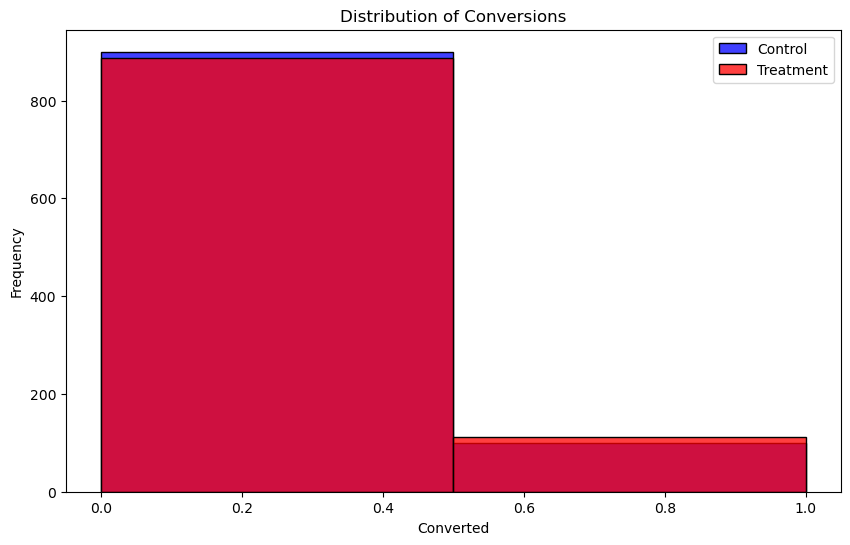

In [28]:
# Plot the distribution of conversions
plt.figure(figsize=(10, 6))
sns.histplot(control_converted, kde=False, color='blue', label='Control', bins=2)
sns.histplot(treatment_converted, kde=False, color='red', label='Treatment', bins=2)
plt.legend()
plt.title('Distribution of Conversions')
plt.xlabel('Converted')
plt.ylabel('Frequency')
plt.show()
